In [61]:
import requests
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

key = os.getenv('key')
id = os.getenv('id')
def Data_load2():
    basic_data = []
    country_data = []
    for action in ['dailySalesList', 'dailyCountyList']:
        if action == 'dailySalesList':
            url = f'http://www.kamis.or.kr/service/price/xml.do?action={action}&p_cert_key={key}&p_cert_id={id}&p_returntype=json'
            response = requests.get(url)
            data = response.json()
            basic_data.extend(data['price'])
        else:
            for county in [1101,2100,2200,2300,2401,2501,2601,3111,3211,3311,3511,3711,3911,3113,3613,3714,3814,3145]:
                url = f'http://www.kamis.or.kr/service/price/xml.do?action={action}&p_cert_key={key}&p_cert_id={id}&p_returntype=json&p_countycode={county}'
                response = requests.get(url)
                data = response.json()
                country_data.extend(data['price'])
        
    return pd.DataFrame(basic_data) , pd.DataFrame(country_data) 

basic_data, country_data = Data_load2()

In [50]:
country_data.columns

Index(['county_code', 'county_name', 'product_cls_code', 'product_cls_name',
       'category_code', 'category_name', 'productno', 'lastest_day',
       'productName', 'item_name', 'unit', 'day1', 'dpr1', 'day2', 'dpr2',
       'day3', 'dpr3', 'day4', 'dpr4', 'direction', 'value'],
      dtype='object')

In [51]:
# country_data = country_data.drop(['county_code','product_cls_code','category_code','productName'],axis=1)
country_data[country_data['county_name']=='서울']

,county_name,product_cls_name,category_name,productno,lastest_day,item_name,unit,day1,dpr1,day2,dpr2,day3,dpr3,day4,dpr4,direction,value
0,서울,"[소매, 소매]",식량작물,272,2024-03-22,쌀/20kg,20kg,당일,"51,189",1일전,"51,189",1개월전,"54,856",1년전,"48,980",2,0.0
1,서울,"[소매, 소매]",식량작물,1537,2024-03-22,쌀/10kg,10kg,당일,"29,331",1일전,"29,331",1개월전,"28,864",1년전,[],2,0.0
2,서울,"[소매, 소매]",식량작물,274,2024-03-22,찹쌀/일반계,1kg,당일,"3,911",1일전,"3,911",1개월전,"3,650",1년전,"3,534",2,0.0
3,서울,"[소매, 소매]",식량작물,275,2024-03-22,콩/흰 콩(국산),500g,당일,"5,313",1일전,"5,313",1개월전,"5,228",1년전,"6,369",2,0.0
4,서울,"[소매, 소매]",식량작물,277,2024-03-22,팥/붉은 팥(국산),500g,당일,"8,859",1일전,"8,859",1개월전,"8,425",1년전,"8,059",2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,서울,"[도매, 도매]",수산물,2805,2024-03-22,갈치/냉동,1kg,당일,"18,000",1일전,"18,000",1개월전,"20,000",1년전,[],2,0.0
174,서울,"[도매, 도매]",수산물,2809,2024-03-22,명태/냉동,20kg,당일,"47,000",1일전,"47,000",1개월전,"50,000",1년전,[],2,0.0
175,서울,"[도매, 도매]",수산물,2812,2024-03-22,건멸치/건멸치,1.5kg,당일,"23,600",1일전,"23,600",1개월전,"23,000",1년전,[],2,0.0
176,서울,"[도매, 도매]",수산물,265,2024-03-22,건미역/건미역,1kg,당일,"12,300",1일전,"12,300",1개월전,"12,300",1년전,"11,000",2,0.0


### 등락율 비교

In [66]:
# country_data['value'] = pd.to_numeric(country_data['value'])
country_data['dpr1'] = country_data['dpr1'].str.replace(',', '').str.strip()
# country_data['dpr2'] = country_data['dpr2'].str.replace(',', '.').str.replace('.',' ')
# country_data['dpr1'] = pd.to_numeric(country_data['dpr1']) # 숫자로 변환
# country_data['dpr2'] = pd.to_numeric(country_data['dpr2']) # 숫자료 변환

ValueError: invalid literal for int() with base 10: '51 189'

In [65]:
country_data['dpr1']

0       51 189
1       29 331
2        3 911
3        5 313
4        8 859
         ...  
2130     9 480
2131     9 980
2132     5 480
2133     9 600
2134     9 100
Name: dpr1, Length: 2135, dtype: object

<Axes: xlabel='item_name', ylabel='value'>

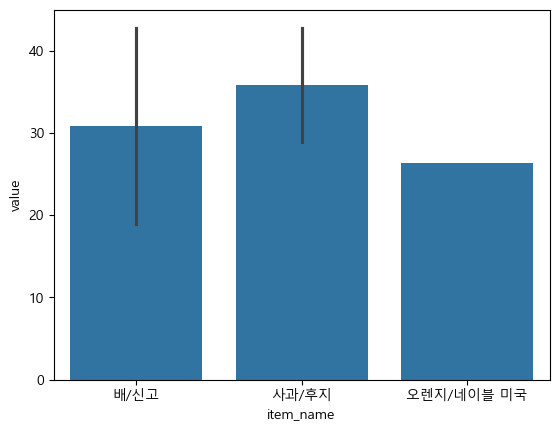

In [31]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

top_index = country_data.groupby('category_name')['value'].nlargest(5).index.values
number_list = []
for category_name, value in top_index:
    number_list.append(int(value))
category_cheaper_data = country_data.loc[number_list]

fruit = category_cheaper_data[category_cheaper_data['category_name']=='과일류']
su = category_cheaper_data[category_cheaper_data['category_name']=='수산물']
sik = category_cheaper_data[category_cheaper_data['category_name']=='식량작물']
food = category_cheaper_data[category_cheaper_data['category_name']=='식품']
vegetable = category_cheaper_data[category_cheaper_data['category_name']=='채소류']
livestock  = category_cheaper_data[category_cheaper_data['category_name']=='축산물']
special = category_cheaper_data[category_cheaper_data['category_name']=='특용작물']
sns.barplot(x="item_name", y="value" ,data=fruit)
# category_cheaper_data

In [32]:
fruit

,county_name,product_cls_name,category_name,productno,lastest_day,item_name,unit,day1,dpr1,day2,dpr2,day3,dpr3,day4,dpr4,direction,value
1876,안동,"[소매, 소매]",과일류,404,2024-03-22,배/신고,10개,당일,47.800,1일전,33.460,1개월전,"40,750",1년전,"19,960",1,42.9
2079,용인,"[소매, 소매]",과일류,398,2024-03-22,사과/후지,10개,당일,37.800,1일전,26.460,1개월전,"26,570",1년전,[],1,42.9
1638,제주,"[소매, 소매]",과일류,398,2024-03-22,사과/후지,10개,당일,26.810,1일전,37.700,1개월전,"31,650",1년전,"25,000",0,28.9
2084,용인,"[소매, 소매]",과일류,433,2024-03-22,오렌지/네이블 미국,10개,당일,15.800,1일전,12.500,1개월전,"15,800",1년전,[],1,26.4
55,서울,"[소매, 소매]",과일류,404,2024-03-22,배/신고,10개,당일,37.526,1일전,31.529,1개월전,"40,635",1년전,"28,797",1,19.0


[Text(-0.125, 0, '배/신고'),
 Text(0.875, 0, '사과/후지'),
 Text(1.875, 0, '사과/후지'),
 Text(2.875, 0, '오렌지/네이블 미국'),
 Text(3.875, 0, '배/신고')]

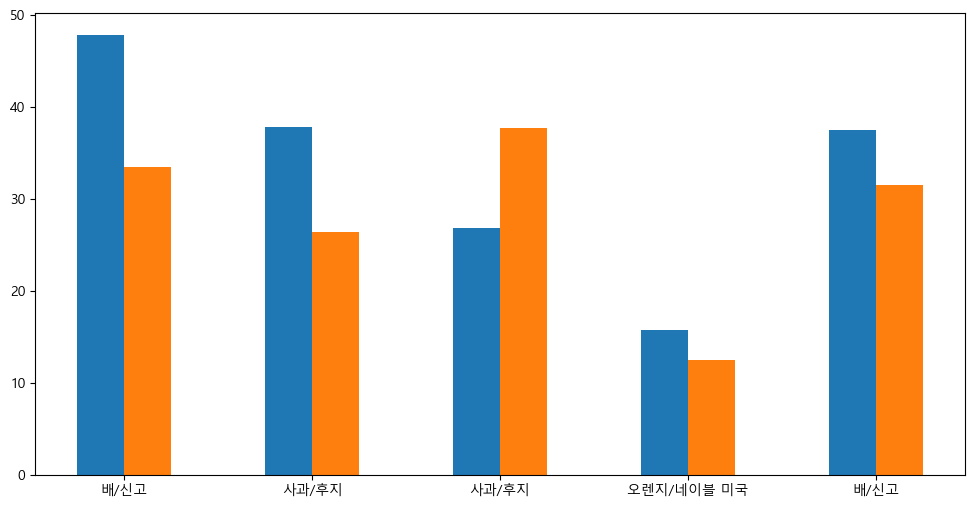

In [59]:
import numpy as np
# fruit = fruit.set_index('item_name')
fig, ax = plt.subplots(figsize=(12,6))
index = np.arange(len(fruit))
w = 0.25
plt.bar(index-w,fruit['dpr1'],width=w)
plt.bar(index,fruit['dpr2'],width=w)

ax.set_xticks(index-w/2)
ax.set_xticklabels(fruit.index)


# plt.bar(index+w,fruit['value'],width=w)

In [26]:
fruit.index

Index([1876, 2079, 1638, 2084, 55], dtype='int64')

In [44]:
country_data['unit'].value_counts()

unit
100g             775
1kg              345
1개               214
10개              127
10kg              75
500g              64
1마리               60
20kg              50
1포기               49
2kg               38
5kg               37
1묶음               31
4kg               30
8kg               20
40kg              19
30구               18
1L                18
150g              17
200g              17
1봉                16
30kg              15
600g              14
15kg              10
2마리                9
10구                7
10kg(그물망 3포기)      5
100개               5
20개                5
7.5kg              5
22.5kg             5
13kg               5
12kg               5
18kg               5
17kg               5
1.5kg              5
50개                3
Name: count, dtype: int64

In [36]:
country_data.head(3)

,county_code,county_name,product_cls_code,product_cls_name,category_code,category_name,productno,lastest_day,productName,item_name,...,day1,dpr1,day2,dpr2,day3,dpr3,day4,dpr4,direction,value
0,1101,서울,"[01, 01]","[소매, 소매]",100,식량작물,272,2024-03-21,쌀/20kg,쌀/20kg,...,당일,"51,189",1일전,"52,522",1개월전,"54,744",1년전,"49,189",0,2.5
1,1101,서울,"[01, 01]","[소매, 소매]",100,식량작물,1537,2024-03-21,쌀/10kg,쌀/10kg,...,당일,"29,331",1일전,"29,109",1개월전,"28,887",1년전,[],1,0.8
2,1101,서울,"[01, 01]","[소매, 소매]",100,식량작물,274,2024-03-21,찹쌀/일반계,찹쌀/일반계,...,당일,"3,911",1일전,"3,911",1개월전,"3,643",1년전,"3,539",2,0.0


In [31]:
country_data[['day1','dpr1'	,'day2'	,'dpr2'	,'day3'	,'dpr3' ,'day4','dpr4']]

,day1,dpr1,day2,dpr2,day3,dpr3,day4,dpr4
0,당일,"51,189",1일전,"52,522",1개월전,"54,744",1년전,"49,189"
1,당일,"29,331",1일전,"29,109",1개월전,"28,887",1년전,[]
2,당일,"3,911",1일전,"3,911",1개월전,"3,643",1년전,"3,539"
3,당일,"5,313",1일전,"5,313",1개월전,"5,228",1년전,"6,367"
4,당일,"8,859",1일전,"8,859",1개월전,"8,388",1년전,"8,054"
...,...,...,...,...,...,...,...,...
2123,당일,"9,600",1일전,"9,600",1개월전,"19,200",1년전,[]
2124,당일,"33,800",1일전,"33,800",1개월전,"33,800",1년전,[]
2125,당일,"5,480",1일전,"5,480",1개월전,"5,480",1년전,[]
2126,당일,"10,800",1일전,"10,800",1개월전,"10,800",1년전,[]


In [20]:
country_data['product_cls_name'] = country_data['product_cls_name'].str.replace('[', '')

In [26]:
country_data['category_name'].value_counts()

category_name
채소류     799
축산물     483
과일류     212
수산물     197
식량작물    186
식품      127
특용작물    124
Name: count, dtype: int64

In [11]:
country_data.columns

Index(['county_code', 'county_name', 'product_cls_code', 'product_cls_name',
       'category_code', 'category_name', 'productno', 'lastest_day',
       'productName', 'item_name', 'unit', 'day1', 'dpr1', 'day2', 'dpr2',
       'day3', 'dpr3', 'day4', 'dpr4', 'direction', 'value'],
      dtype='object')